In [7]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt
import datetime 

In [8]:
print(tf.__version__)

1.14.0


In [9]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [14]:
def plot_sample(index):
    plt.figure(figsize = (13,2))
    plt.imshow(X_train[index])

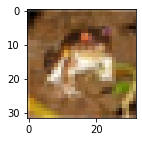

In [15]:
plot_sample(0)

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [18]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
# converting y_train to one-hot-encoding form 
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32"
)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32"
)

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2500, activation="relu"),
     keras.layers.Dense(1500, activation="relu"),
     keras.layers.Dense(10, activation="sigmoid")
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),histogram_freq=1)

model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=5, callbacks=[tb_callback])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 289s 6ms/sample - loss: 1.8572 - acc: 0.3347
Epoch 2/5
50000/50000 [==============================] - 303s 6ms/sample - loss: 1.6588 - acc: 0.4135
Epoch 3/5
50000/50000 [==============================] - 232s 5ms/sample - loss: 1.5736 - acc: 0.4433
Epoch 4/5
50000/50000 [==============================] - 318s 6ms/sample - loss: 1.5114 - acc: 0.4651
Epoch 5/5
50000/50000 [==============================] - 284s 6ms/sample - loss: 1.4612 - acc: 0.4851


In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4056), started 0:01:05 ago. (Use '!kill 4056' to kill it.)